# Set up Data Generation

In [2]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import torch
from numpy import random
from sympy import *


In [12]:
sim = False
print(f"{'sim' if sim else 'hardware'}")

hardware


In [13]:
g =  9.806
m = 1.55 if sim else 1.69
print(f"{m = } because {'sim' if sim else 'hardware'} mode is activated")

m = 1.69 because hardware mode is activated


In [15]:
curr_thrust = random.uniform(0.5,27)
curr_rolldot, curr_pitchdot, curr_yawdot = random.uniform(-0.9,0.9), random.uniform(-0.9,0.9), random.uniform(-0.9,0.9)


In [16]:
curr_x, curr_y, curr_z = random.uniform(-3,3), random.uniform(-3,3), random.uniform(0,2)
curr_vx, curr_vy, curr_vz = random.uniform(-.7,.7), random.uniform(-.7,.7), random.uniform(-.7,.7)
curr_roll, curr_pitch, curr_yaw = random.uniform(-.2,.2), random.uniform(-.2,.2), random.uniform(-.2,.2)

In [17]:
T_lookahead = 0.8
integration_step = 0.1
integrations = T_lookahead / integration_step
integrations_int = int(integrations)

In [18]:
C = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [19]:
cumm_change_x = 0.0
cumm_change_y = 0.0
cumm_change_z = 0.0
cumm_change_vx = 0.0
cumm_change_vy = 0.0
cumm_change_vz = 0.0
cumm_change_roll = 0.0
cumm_change_pitch = 0.0
cumm_change_yaw = 0.0

xdot = curr_vx
ydot = curr_vy
zdot = curr_vz

vxdot = -(curr_thrust/m) * (sin(curr_roll)*sin(curr_yaw) + cos(curr_roll)*cos(curr_yaw)*sin(curr_pitch));
vydot = -(curr_thrust/m) * (cos(curr_roll)*sin(curr_yaw)*sin(curr_pitch) - cos(curr_yaw)*sin(curr_roll));
vzdot = g - (curr_thrust/m) * (cos(curr_roll)*cos(curr_pitch));

rolldot = curr_rolldot
pitchdot = curr_pitchdot
yawdot = curr_yawdot

roll = curr_roll
pitch = curr_pitch
yaw = curr_yaw
change_vx = 0
change_vy = 0
change_vz = 0


In [20]:
for _ in range(integrations_int):
  change_x = (xdot+cumm_change_vx) * integration_step;
  change_y = (ydot+cumm_change_vy) * integration_step;
  change_z = (zdot+cumm_change_vz) * integration_step;
  change_vx = vxdot * integration_step;
  change_vy = vydot * integration_step;
  change_vz = vzdot * integration_step;
  change_roll = rolldot * integration_step;
  change_pitch = pitchdot * integration_step;
  change_yaw = yawdot * integration_step;

  roll = roll + change_roll;
  pitch = pitch + change_pitch;
  yaw =  yaw + change_yaw;

  sr = sin(roll)
  sy = sin(yaw)
  sp = sin(pitch)

  cr = cos(roll)
  cp = cos(pitch)
  cy = cos(yaw)


  vxdot = -(curr_thrust/m) * (sr*sy + cr*cy*sp);
  vydot = -(curr_thrust/m) * (cr*sy*sp - cy*sr);
  vzdot = g - (curr_thrust/m) * (cr*cp);


  cumm_change_x = cumm_change_x + change_x;
  cumm_change_y = cumm_change_y + change_y;
  cumm_change_z = cumm_change_z + change_z;
  cumm_change_vx = cumm_change_vx + change_vx;
  cumm_change_vy = cumm_change_vy + change_vy;
  cumm_change_vz = cumm_change_vz + change_vz;
  cumm_change_roll = cumm_change_roll + change_roll;
  cumm_change_pitch = cumm_change_pitch + change_pitch;
  cumm_change_yaw = cumm_change_yaw + change_yaw;




x = curr_x + cumm_change_x
y = curr_y + cumm_change_y
z = curr_z + cumm_change_z

vx = curr_vx + cumm_change_vx
vy = curr_vy + cumm_change_vy
vz = curr_vz + cumm_change_vz

roll = curr_roll + cumm_change_roll;
pitch = curr_pitch + cumm_change_pitch;
yaw = curr_yaw + cumm_change_yaw;

nonlin_pred = np.array([[x, y, z, vx, vy, vz, roll, pitch, yaw]]).T
outputs = C @ nonlin_pred

In [21]:
outputs

array([[0.0276239977661290],
       [-0.223444792142065],
       [2.07170495827081],
       [0.283824351749256]], dtype=object)

In [22]:
def get_outputs(num_data_gen=100):
  allData = np.empty((0, 17))
  # print(allData)
  for i in range(num_data_gen):
    curr_thrust = random.uniform(0.5,27)
    curr_rolldot, curr_pitchdot, curr_yawdot = random.uniform(-0.9,0.9), random.uniform(-0.9,0.9), random.uniform(-0.9,0.9)
    curr_x, curr_y, curr_z = random.uniform(-3,3), random.uniform(-3,3), random.uniform(0,-2)
    # print(f"curr_z: {curr_z}")
    # print(f"curr_thrust: {curr_thrust}")
    curr_vx, curr_vy, curr_vz = random.uniform(-.7,.7), random.uniform(-.7,.7), random.uniform(-.7,.7)
    curr_roll, curr_pitch, curr_yaw = random.uniform(-.2,.2), random.uniform(-.2,.2), random.uniform(-.2,.2)

    stateVector = [curr_x, curr_y, curr_z, curr_vx, curr_vy, curr_vz, curr_roll, curr_pitch, curr_yaw]
    inputVector = [curr_thrust, curr_rolldot, curr_pitchdot, curr_yawdot]

    cumm_change_x = 0.0
    cumm_change_y = 0.0
    cumm_change_z = 0.0
    cumm_change_vx = 0.0
    cumm_change_vy = 0.0
    cumm_change_vz = 0.0
    cumm_change_roll = 0.0
    cumm_change_pitch = 0.0
    cumm_change_yaw = 0.0

    xdot = curr_vx
    ydot = curr_vy
    zdot = curr_vz

    vxdot = -(curr_thrust/m) * (sin(curr_roll)*sin(curr_yaw) + cos(curr_roll)*cos(curr_yaw)*sin(curr_pitch));
    vydot = -(curr_thrust/m) * (cos(curr_roll)*sin(curr_yaw)*sin(curr_pitch) - cos(curr_yaw)*sin(curr_roll));
    vzdot = g - (curr_thrust/m) * (cos(curr_roll)*cos(curr_pitch));

    rolldot = curr_rolldot
    pitchdot = curr_pitchdot
    yawdot = curr_yawdot

    roll = curr_roll
    pitch = curr_pitch
    yaw = curr_yaw
    change_vx = 0
    change_vy = 0
    change_vz = 0

    for _ in range(integrations_int):
      change_x = (xdot+cumm_change_vx) * integration_step;
      change_y = (ydot+cumm_change_vy) * integration_step;
      change_z = (zdot+cumm_change_vz) * integration_step;
      change_vx = vxdot * integration_step;
      change_vy = vydot * integration_step;
      change_vz = vzdot * integration_step;
      change_roll = rolldot * integration_step;
      change_pitch = pitchdot * integration_step;
      change_yaw = yawdot * integration_step;

      roll = roll + change_roll;
      pitch = pitch + change_pitch;
      yaw =  yaw + change_yaw;

      sr = sin(roll)
      sy = sin(yaw)
      sp = sin(pitch)

      cr = cos(roll)
      cp = cos(pitch)
      cy = cos(yaw)


      vxdot = -(curr_thrust/m) * (sr*sy + cr*cy*sp);
      vydot = -(curr_thrust/m) * (cr*sy*sp - cy*sr);
      vzdot = g - (curr_thrust/m) * (cr*cp);


      cumm_change_x = cumm_change_x + change_x;
      cumm_change_y = cumm_change_y + change_y;
      cumm_change_z = cumm_change_z + change_z;
      cumm_change_vx = cumm_change_vx + change_vx;
      cumm_change_vy = cumm_change_vy + change_vy;
      cumm_change_vz = cumm_change_vz + change_vz;
      cumm_change_roll = cumm_change_roll + change_roll;
      cumm_change_pitch = cumm_change_pitch + change_pitch;
      cumm_change_yaw = cumm_change_yaw + change_yaw;


    x = curr_x + cumm_change_x
    y = curr_y + cumm_change_y
    z = curr_z + cumm_change_z
    # print(f"z: {z}")
    # print("\n")

    vx = curr_vx + cumm_change_vx
    vy = curr_vy + cumm_change_vy
    vz = curr_vz + cumm_change_vz

    roll = curr_roll + cumm_change_roll;
    pitch = curr_pitch + cumm_change_pitch;
    yaw = curr_yaw + cumm_change_yaw;

    nonlin_pred = np.array([[x, y, z, vx, vy, vz, roll, pitch, yaw]]).T
    outputs = C @ nonlin_pred

    outputs2 = outputs.squeeze().tolist()
    finalData = stateVector + inputVector + outputs2
    finalData = np.array(finalData, dtype=float)
    allData = np.vstack((allData, finalData))

  return allData

In [12]:
get_outputs(2).shape

(2, 17)

In [23]:
# data_all = get_outputs(num_data_gen=50_000)

In [24]:
# np.save('50k_holybro', data_all)

# Set up Neural Network Parameters and DataLoaders

In [3]:
from torch import nn
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [4]:
num_epochs = 50
batch_size = 128
learning_rate = 1e-3

In [5]:
data_all = np.load('50k_holybro.npy')

In [6]:
class QuadrotorDataset(Dataset):
  def __init__(self, data_path = 'testing.csv', time_size=1, state_size = 9, ctrlinput_size = 4, training=True, data_all = data_all):
    self.input_size = state_size + ctrlinput_size
    self.output_size = ctrlinput_size

    self.data = data_all

    np.random.shuffle(data_all)
    train_size = int(len(data_all)*0.8)


    if training:
      self.data = data_all[0:train_size]
    else:
      self.data = data_all[train_size:]

    print(self.data.shape)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    # print(self.data[idx,:])
    inputs = self.data[idx, 0: self.input_size]
    outputs = self.data[idx, self.input_size:]
    # print(type(inputs))
    # print(type(outputs))
    # print(inputs)
    # print(inputs.dtype)
    # print("h")
    return torch.FloatTensor(inputs), torch.FloatTensor(outputs).view(4)
    return torch.FloatTensor(inputs), torch.FloatTensor(outputs)

In [7]:
train_dataset = QuadrotorDataset(training=True)
test_dataset = QuadrotorDataset(training=False)

(40000, 17)
(10000, 17)


In [8]:
train_dataset[0][1].shape

torch.Size([4])

In [9]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=1,
    shuffle=True,
)
for data in train_dataloader:
    input_data, output_data = data
    print(output_data.shape)
    print(output_data)
    print(output_data.dim())
    break

torch.Size([1, 4])
tensor([[-1.2906,  1.1651,  0.4763,  0.2900]])
2


In [10]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [11]:
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

# Feed Forward

In [38]:
class FeedForward(nn.Module):
    def __init__(self, input_size = 13, output_size = 4):
        super().__init__()
        self.feedfwd_stack = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )
    def forward(self, x):
        logits = self.feedfwd_stack(x)
        return logits

In [39]:
model_FF = FeedForward()

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9, weight_decay=1e-5)
optimizer = torch.optim.AdamW(model_FF.parameters(), lr=learning_rate, weight_decay=1e-4)


criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
FF_accuracy_array = np.zeros(num_epochs)

def test_generalization(epoch):
    #Before training and at every stage of training
    total_loss = []
    with torch.no_grad():
      for data in test_dataloader:
        input_data, output_data = data

        output_pred = model_FF(input_data)
        loss = criterion(output_pred, output_data)

        total_loss.append(loss)


    average_loss = sum(total_loss) / len(total_loss)
    print(f"average loss in epoch #{epoch}: {average_loss * 100}")
    FF_accuracy_array[epoch] = average_loss * 100


# gradients_by_epoch = {param: [] for param in model_FF.parameters()}

loss_values = []

def train_feedfwd():
  #train:
  for epoch in range(num_epochs):

    # test before training starts and at every epoch
    test_generalization(epoch)



    #train over epochs
    total_loss = 0
    for data in train_dataloader:
        input_data, output_data = data

        output_pred = model_FF(input_data)
        loss = criterion(output_pred, output_data)

        optimizer.zero_grad()
        loss.backward()

        # for param in model_FF.parameters():
        #     gradients_by_epoch[param].append(param.grad.clone().detach())

        optimizer.step()

        # for param in model_FF.parameters():
        #     param.grad = None



#       optimizer.step()



        total_loss += loss.data
    scheduler.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, total_loss/12995*100))
    loss_values.append(total_loss/12995*100)

  test_generalization(epoch) #after final training

train_feedfwd()

average loss in epoch #0: 218.82931518554688
epoch [1/50], loss:0.4196
average loss in epoch #1: 3.6397225856781006
epoch [2/50], loss:0.0319
average loss in epoch #2: 1.031665563583374
epoch [3/50], loss:0.0184
average loss in epoch #3: 0.7688420414924622
epoch [4/50], loss:0.0150
average loss in epoch #4: 0.5308622121810913
epoch [5/50], loss:0.0109
average loss in epoch #5: 0.6754956841468811
epoch [6/50], loss:0.0089
average loss in epoch #6: 0.46894001960754395
epoch [7/50], loss:0.0070
average loss in epoch #7: 0.277279794216156
epoch [8/50], loss:0.0070
average loss in epoch #8: 0.4531775116920471
epoch [9/50], loss:0.0066
average loss in epoch #9: 0.3165721297264099
epoch [10/50], loss:0.0055
average loss in epoch #10: 0.17464973032474518
epoch [11/50], loss:0.0058
average loss in epoch #11: 0.2290477454662323
epoch [12/50], loss:0.0056
average loss in epoch #12: 0.32405099272727966
epoch [13/50], loss:0.0052
average loss in epoch #13: 0.22354598343372345
epoch [14/50], loss:0.

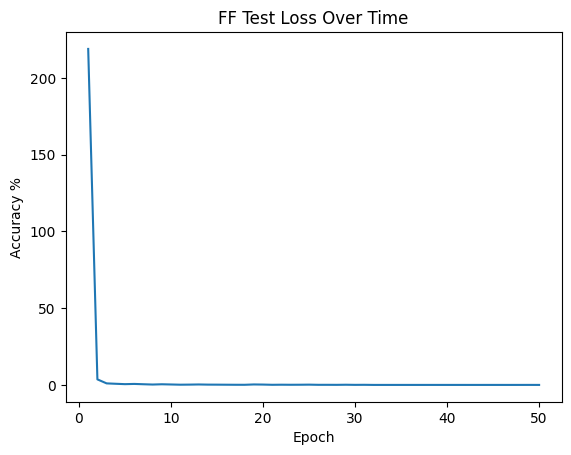

In [40]:
# Plot avg error over epochs
x = np.arange(1,num_epochs+1 , dtype = int)
fig, ax = plt.subplots()
plt.plot(x, FF_accuracy_array.T)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy %')
ax.set_title('FF Test Loss Over Time')
plt.show()

In [41]:
PATH = "holybro_ff.pt"
torch.save(model_FF.state_dict(), PATH)

# LSTM

In [18]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=13, hidden_size=64, num_layers=5, output_size=4):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out)

In [19]:
# model = FeedForward()
modelLSTM = LSTMModel()

# optimizer = torch.optim.SGD(modelLSTM.parameters(), lr=learning_rate, momentum = 0.9, weight_decay=1e-5)
optimizer = torch.optim.AdamW(modelLSTM.parameters(), lr=learning_rate, weight_decay=1e-4)


criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
LSTM_accuracy_array = np.zeros(num_epochs)

In [20]:
def test_generalization(epoch):
    #Before training and at every stage of training
    total_loss = []
    with torch.no_grad():
      for data in test_dataloader:
        input_data, output_data = data

        output_pred = modelLSTM(input_data)
        loss = criterion(output_pred, output_data)

        total_loss.append(loss)


    average_loss = sum(total_loss) / len(total_loss)
    print(f"average loss in epoch #{epoch}: {average_loss * 100}")
    LSTM_accuracy_array[epoch] = average_loss * 100


loss_values = []

def train_LSTM():
  #train:
  for epoch in range(num_epochs):

    # test before training starts and at every epoch
    test_generalization(epoch)



    #train over epochs
    total_loss = 0
    for data in train_dataloader:
        input_data, output_data = data

        output_pred = modelLSTM(input_data)
        loss = criterion(output_pred, output_data)

        optimizer.zero_grad()
        loss.backward()

        # for param in modelLSTM.parameters():
        #     gradients_by_epoch[param].append(param.grad.clone().detach())

        optimizer.step()

        # for param in modelLSTM.parameters():
        #     param.grad = None



#       optimizer.step()



        total_loss += loss.data
    scheduler.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, total_loss/12995*100))
    loss_values.append(total_loss/12995*100)

  test_generalization(epoch) #after final training


In [21]:
train_LSTM()

average loss in epoch #0: 223.4302215576172
epoch [1/50], loss:3.9751
average loss in epoch #1: 73.0782241821289
epoch [2/50], loss:1.1409
average loss in epoch #2: 12.166862487792969
epoch [3/50], loss:0.1776
average loss in epoch #3: 6.0021538734436035
epoch [4/50], loss:0.1404
average loss in epoch #4: 5.44034481048584
epoch [5/50], loss:0.1332
average loss in epoch #5: 5.221969127655029
epoch [6/50], loss:0.1290
average loss in epoch #6: 5.233341217041016
epoch [7/50], loss:0.1269
average loss in epoch #7: 5.004148483276367
epoch [8/50], loss:0.1246
average loss in epoch #8: 5.465175628662109
epoch [9/50], loss:0.1226
average loss in epoch #9: 5.164748191833496
epoch [10/50], loss:0.1208
average loss in epoch #10: 4.885048866271973
epoch [11/50], loss:0.1196
average loss in epoch #11: 4.85483980178833
epoch [12/50], loss:0.1185
average loss in epoch #12: 4.7897233963012695
epoch [13/50], loss:0.1175
average loss in epoch #13: 4.782771110534668
epoch [14/50], loss:0.1177
average los

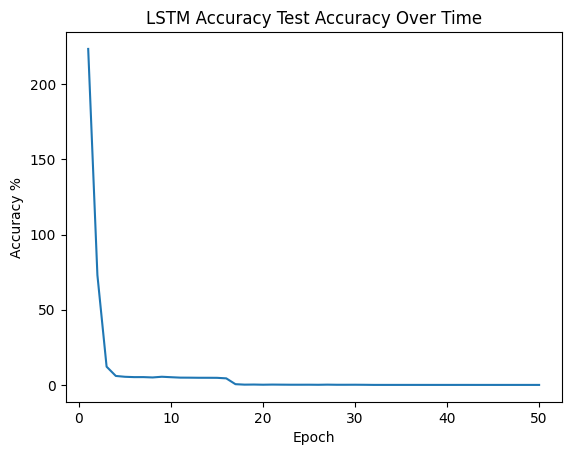

In [28]:
# Plot avg error over epochs
x = np.arange(1,num_epochs+1 , dtype = int)
fig, ax = plt.subplots()
plt.plot(x, LSTM_accuracy_array.T)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy %')
ax.set_title('LSTM Accuracy Test Accuracy Over Time')
plt.show()

In [31]:
PATH = "holybro_lstm.pt"
torch.save(modelLSTM.state_dict(), PATH)

# RNN

In [23]:
# Define the RNN model class
num_epochs = 50
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
#         super(RNNModel, self).__init()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size

        # Define the RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        # Define the output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # print(f"self.num_layers: {self.num_layers}")
        # print(f"x.size(0): {x.size(0)}")
        # print(f"self.hidden_size: {self.hidden_size}")
        out, _ = self.rnn(x, h0)

        # print(f"out.shape: {out.shape}")

        out = self.fc(out[-1, :, :])
        # print(f"out.shape: {out.shape}")
        # quit()
        return out



In [24]:
# Set the input size, hidden size, number of layers, and output size
input_size = 13  # Example input size (adjust as needed)
hidden_size = 4  # Number of units in the hidden state
num_layers = 8  # Number of RNN layers
output_size = 4  # Example output size (adjust as needed)

# Create the RNN model
modelRNN = RNNModel(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(modelRNN.parameters(), lr=0.005)
# optimizer = torch.optim.SGD(modelRNN.parameters(), lr=learning_rate, momentum = 0.9, weight_decay=1e-5)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
RNN_accuracy_array = np.zeros(num_epochs)


In [25]:
def test_generalization(epoch):
    #Before training and at every stage of training
    total_loss = []
    with torch.no_grad():
      for data in test_dataloader:
        input_data, output_data = data


        # Add a batch dimension if necessary
        if input_data.dim() == 2:
            input_data = input_data.unsqueeze(0)

        output_pred = modelRNN(input_data)
        loss = criterion(output_pred, output_data)

        total_loss.append(loss)


    average_loss = sum(total_loss) / len(total_loss)
    print(f"average test error in epoch #{epoch}: {average_loss * 100}%")
    RNN_accuracy_array[epoch] = average_loss * 100



loss_values = []

def train_RNN():
  #train:
  for epoch in range(num_epochs):

    # test before training starts and at every epoch
    test_generalization(epoch)



    #train over epochs
    total_loss = 0
    for data in train_dataloader:
        input_data, output_data = data


        # Add a batch dimension if necessary
        if input_data.dim() == 2:
            input_data = input_data.unsqueeze(0)
        output_pred = modelRNN(input_data)
        loss = criterion(output_pred, output_data)

        optimizer.zero_grad()
        loss.backward()

        # for param in modelRNN.parameters():
        #     gradients_by_epoch[param].append(param.grad.clone().detach())

        optimizer.step()

        # for param in modelRNN.parameters():
        #     param.grad = None



#       optimizer.step()



        total_loss += loss.data
    scheduler.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, total_loss/12995*100))
    loss_values.append(total_loss/12995*100)

  test_generalization(epoch) #after final training


In [26]:
train_RNN()

average test error in epoch #0: 254.60426330566406%
epoch [1/50], loss:4.0289
average test error in epoch #1: 137.67124938964844%
epoch [2/50], loss:2.8302
average test error in epoch #2: 81.06857299804688%
epoch [3/50], loss:1.6348
average test error in epoch #3: 60.07935333251953%
epoch [4/50], loss:1.3672
average test error in epoch #4: 56.19047927856445%
epoch [5/50], loss:1.2938
average test error in epoch #5: 53.27189636230469%
epoch [6/50], loss:1.2342
average test error in epoch #6: 50.5198974609375%
epoch [7/50], loss:1.1964
average test error in epoch #7: 51.494102478027344%
epoch [8/50], loss:1.1694
average test error in epoch #8: 48.17242431640625%
epoch [9/50], loss:1.1437
average test error in epoch #9: 48.737022399902344%
epoch [10/50], loss:1.1395
average test error in epoch #10: 46.74382781982422%
epoch [11/50], loss:1.1272
average test error in epoch #11: 46.799354553222656%
epoch [12/50], loss:1.1238
average test error in epoch #12: 46.32181167602539%
epoch [13/50], 

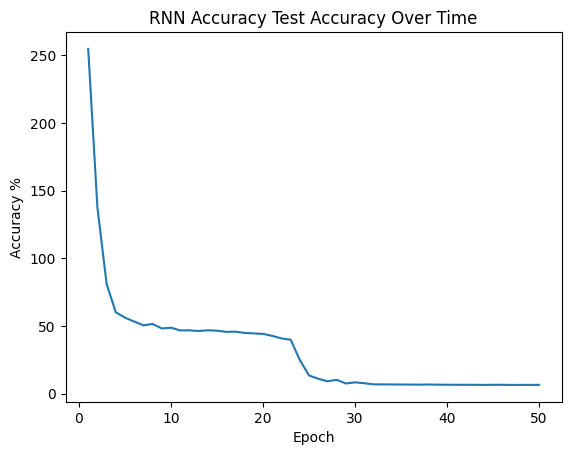

In [29]:
# Plot avg error over epochs
x = np.arange(1,num_epochs+1 , dtype = int)
fig, ax = plt.subplots()
plt.plot(x, RNN_accuracy_array.T)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy %')
ax.set_title('RNN Accuracy Test Accuracy Over Time')
plt.show()

In [30]:
PATH = "holybro_rnn.pt"
torch.save(modelRNN.state_dict(), PATH)

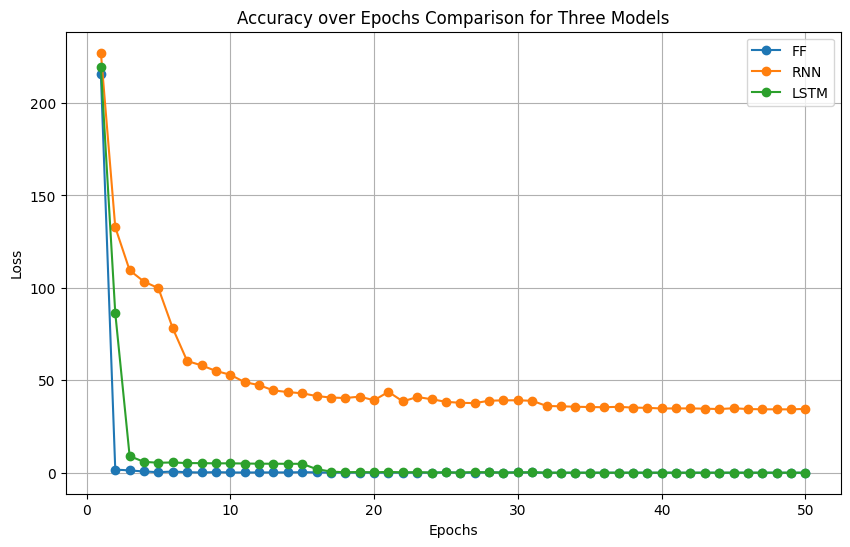

In [63]:
# Create x-values (e.g., epochs)
epochs = range(1, num_epochs + 1)

# Plot the loss values for each model
plt.figure(figsize=(10, 6))
plt.plot(epochs, FF_accuracy_array, label='FF', marker='o')
plt.plot(epochs, RNN_accuracy_array, label='RNN', marker='o')
plt.plot(epochs, LSTM_accuracy_array, label='LSTM', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy over Epochs Comparison for Three Models')
plt.legend()

# Show the plot
plt.grid()
plt.show()